In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
df = pd.read_csv('1992_Calculations.txt')

# Drop any NaNs
df = df[np.isfinite(df['CAPE'])]
df = df[np.isfinite(df['CAPE_Tv'])]
df = df[df['CAPE_Tv']>0]

In [38]:
df.head()

,Unnamed: 0,CAPE,CAPE_Tv,CIN,CIN_Tv,Date,Station,Time
9,9,62.261373,133.022539,0.000000,0.000000,1992-01-01,CRP,0
12,12,83.348092,114.441967,-52.945111,-5.854331,1992-01-01,DRT,0
28,28,199.498327,251.578214,0.000000,0.000000,1992-01-01,OUN,0
47,47,116.958027,208.891308,-35.565627,0.000000,1992-01-01,BRO,12
79,79,9.602577,10.189138,0.000000,0.000000,1992-01-01,UIL,12


In [39]:
# Calculate the absolute difference between corrected and uncorrected CAPE/CIN values
df['CAPE_Abs_Difference'] = df['CAPE_Tv'] - df['CAPE']
df['CIN_Abs_Difference'] = df['CIN_Tv'] - df['CIN']

# Calculate the relative difference between corrected and uncorrected CAPE/CIN values
df['CAPE_Rel_Difference'] = df['CAPE_Abs_Difference'] / df['CAPE_Tv']
df['CIN_ARel_Difference'] = df['CIN_Abs_Difference'] / df['CIN_Tv']

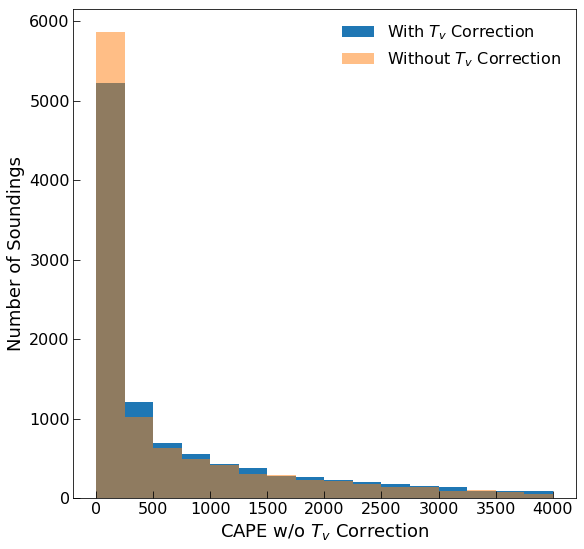

In [40]:
# Cape Histogram
# Setup figure and axes
fig = plt.figure(figsize=(9, 9))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel('CAPE w/o $T_v$ Correction', fontsize=18)
ax1.set_ylabel(r'Number of Soundings', fontsize=18)

# Turn up label sizes
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=12)

# Make ticks interior and large
ax1.tick_params(direction='in', length=7)

# Plotting
bin_edges = np.arange(0, 4200, 250)
ax1.hist(np.array(df['CAPE_Tv']), bins=bin_edges, alpha=1, label='With $T_v$ Correction')
ax1.hist(np.array(df['CAPE']), bins=bin_edges, alpha=0.5, label='Without $T_v$ Correction')

plt.legend(fontsize=16, frameon=False)

# Set limits
#ax1.set_xlim(0,200)
#ax1.set_ylim(0,200)

plt.savefig('../Plots/1992_CAPE_Histogram.png', bbox_inches='tight', dpi=300);  

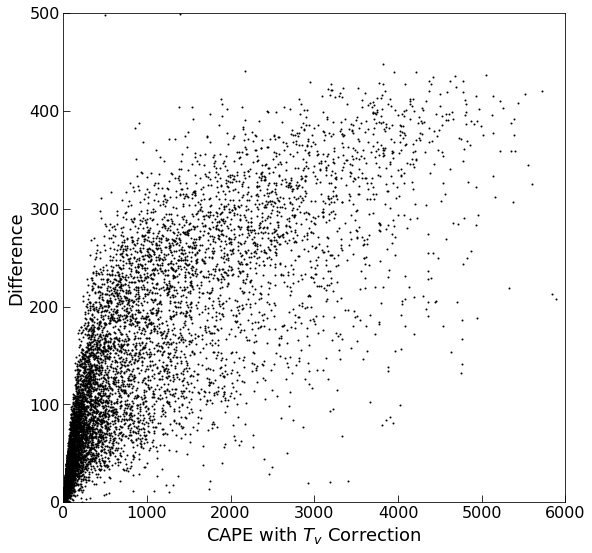

In [41]:
# Cape Histogram
# Setup figure and axes
fig = plt.figure(figsize=(9, 9))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel('CAPE with $T_v$ Correction', fontsize=18)
ax1.set_ylabel(r'Difference', fontsize=18)

# Turn up label sizes
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=12)

# Make ticks interior and large
ax1.tick_params(direction='in', length=7)

# Plotting
ax1.plot(df['CAPE_Tv'], df['CAPE_Abs_Difference'], color='k', linestyle='None', marker='o', markersize=1)

# Set limits
ax1.set_xlim(0,6000)
ax1.set_ylim(0,500)

plt.savefig('../Plots/1992_CAPE_Absolute_Difference.png', bbox_inches='tight', dpi=300);  

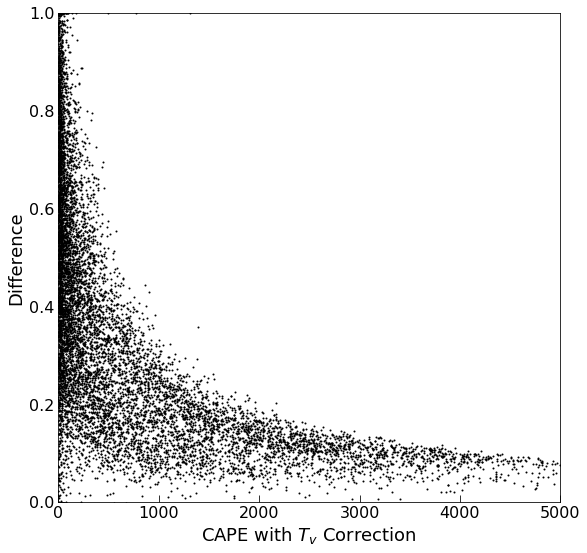

In [42]:
# Cape Histogram
# Setup figure and axes
fig = plt.figure(figsize=(9, 9))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel('CAPE with $T_v$ Correction', fontsize=18)
ax1.set_ylabel(r'Difference', fontsize=18)

# Turn up label sizes
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=12)

# Make ticks interior and large
ax1.tick_params(direction='in', length=7)

# Plotting
ax1.plot(df['CAPE_Tv'], df['CAPE_Rel_Difference'], color='k', linestyle='None', marker='o', markersize=1)

# Set limits
ax1.set_xlim(0,5000)
ax1.set_ylim(0,1)

plt.savefig('../Plots/1992_CAPE_Relative_Difference.png', bbox_inches='tight', dpi=300);  